Looking at a decoy SST dataset - for training data, a word indicating the class (positive or negative) was inserted into the sentences. 

In [75]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
from os.path import join
import torch
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [82]:
trained_model_folder = '../models/SST'
save_path = '../results_for_export'

fnames = sorted([oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]) 
# other models were trained badly


In [83]:

results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() # pandas dataframe w/ hyperparams and weights stored



In [ ]:
results = results[results.bias == 'Genderbias']
results = results[results.bias == 'Article']
results = results[results.bias == 'Decoy']

In [84]:

results["Test Accuracy"] = [int(max(x)) for x in results["accs_test"]] # currently on test data - since not used for early stopping 
results["final_cd"] = [min(x) for x in results["explanation_divergence"]]
results["final_test_loss"] = [min(x) for x in results["losses_test"]]
results["final_train_loss"] = [x[-1] for x in results["losses_train"]]


In [88]:
concise_out = results[['signal_strength', 'Test Accuracy','final_test_loss', 'bias']].groupby(by = ['bias', 'signal_strength']).mean()

In [90]:
concise_out

Test Accuracy  final_test_loss
bias       signal_strength                                
Article    0.0                  57.800000         1.268143
           100.0                65.000000         0.683735
           200.0                67.200000         0.601965
           300.0                66.600000         0.622583
Decoy      0.0                  56.600000         1.175293
           100.0                67.000000         0.613578
           200.0                71.400000         0.590073
           300.0                71.600000         0.517029
Genderbias 0.0                  64.285714         0.961213
           100.0                74.600000         0.673706
           200.0                76.000000         0.634726
           300.0                76.000000         0.595987

In [59]:
if use_biased:
    tex_name = 'cd_SST_bias_tex_gender.tex'
else:
    tex_name = 'cd_SST_decoy_tex.tex'
with open(oj(save_path, tex_name), 'w') as f:
          f.write(concise_out.to_latex(index  = False))
concise_out = concise_out.reset_index()

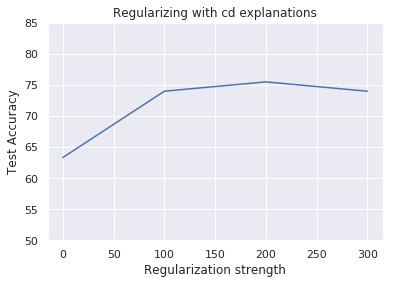

In [61]:
plot = sns.lineplot(x ='signal_strength' , y='Test Accuracy', data = concise_out  );
# plot.set(xscale="log")
plt.ylim(50, 85)
plot.set_xlabel("Regularization strength")
plot.set_ylabel("Test Accuracy")
plot.set_title("Regularizing with cd explanations");
fig  = plot.get_figure()
if use_biased:
    fig.savefig(oj(save_path,"cd_SST_bias"))
else:
    fig.savefig(oj(save_path,"cd_SST_decoy"))